# Anime Score Classifier using Neural Networks (No popularity)

# 1. Importing Libaries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import regularizers

In [118]:
df = pd.read_csv('mal-anime.csv')
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [119]:
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

# 3. Data Preprocessing

In [120]:
genres = df['Genres']
split_genres = genres.str.split(',').apply(lambda x: [i.strip() for i in x])

# Flatten the list of genres and find the unique genres
unique_genres = pd.unique([item for sublist in split_genres for item in sublist])
print(unique_genres)

['Action' 'Adventure' 'Comedy' 'Drama' 'Sci-Fi' 'Space' 'Mystery'
 'Shounen' 'Police' 'Supernatural' 'Magic' 'Fantasy' 'Sports' 'Josei'
 'Romance' 'Slice of Life' 'Cars' 'Seinen' 'Horror' 'Psychological'
 'Thriller' 'Super Power' 'Martial Arts' 'School' 'Ecchi' 'Vampire'
 'Military' 'Historical' 'Dementia' 'Mecha' 'Demons' 'Samurai' 'Game'
 'Shoujo' 'Harem' 'Music' 'Shoujo Ai' 'Shounen Ai' 'Kids' 'Hentai'
 'Parody' 'Yuri' 'Yaoi' 'Unknown']


In [121]:
for genre in unique_genres:
    df[genre] = split_genres.apply(lambda x: 1 if genre in x else 0)
df.rename(columns={'Unknown': 'Unknown_Genre'}, inplace=True)
df.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1', 'Action',
       'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen',
       'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei',
       'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown_Genre'],
      dtype='objec

In [122]:
print(len(df[df["Episodes"] == "Unknown"]["Name"]))
print(df[df["Episodes"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Episodes' column 
df = df[df['Episodes'] != 'Unknown']
print(len(df[df["Score"] == "Unknown"]["Name"]))
print(df[df["Score"] == "Unknown"]["Name"].head(10))
# Drop all rows with 'Unknown' in the 'Score', 'Ranked', and 'Aired' column 
df = df[df['Score'] != 'Unknown']
# df = df[df['Ranked'] != 'Unknown']
df = df[df['Aired'] != 'Unknown']

516
11                     One Piece
211              Detective Conan
871             Crayon Shin-chan
1093            Nintama Rantarou
1787          Sore Ike! Anpanman
2203                   Sazae-san
3650                   Ojarumaru
4477    Chibi Maruko-chan (1995)
5040                    Knyacki!
5334                   Hanakappa
Name: Name, dtype: object
4730
1404                                     Obake no Q-tarou
1504                                      PostPet Momobin
1578                           Shibawanko no Wa no Kokoro
1699                              Silk Road Shounen Yuuto
1893    Hengen Taima Yakou Karura Mau! Sendai Kokeshi ...
1990    Kouchuu Ouja Mushiking Super Battle Movie: Yam...
2165                                  Touma Kishinden Oni
2422            Dorami-chan: Wow, The Kid Gang of Bandits
2425                   Dorami-chan: Hello Kyouryuu Kids!!
2428                        Dorami-chan: A Blue Straw Hat
Name: Name, dtype: object


In [123]:
smallest_years = []

for aired in df['Aired']:
    # Extract all years using regular expressions
    years = re.findall('(\d{4})', aired)
    
    # Convert the years to integers
    years = [int(year) for year in years] 
    if years:
        smallest_years.append(min(years))
    else:
        smallest_years.append(np.nan)

# Replace the 'Aired' column with the smallest years
df['Aired'] = smallest_years
df['Aired'].head()

0    1998
1    2001
2    1998
3    2002
4    2004
Name: Aired, dtype: int64

In [124]:
def convert_to_seconds(duration):
    time_units = duration.split()
    seconds = 0
    for i in range(0, len(time_units), 2):
        if i+1 < len(time_units):
            if 'h' in time_units[i+1]:
                seconds += int(time_units[i]) * 3600
            elif 'm' in time_units[i+1]:
                seconds += int(time_units[i]) * 60
            elif 's' in time_units[i+1]:
                seconds += int(time_units[i])
    return seconds

df['Duration'] = df['Duration'].apply(convert_to_seconds)
df['Duration'].head()

0    1440
1    6900
2    1440
3    1500
4    1380
Name: Duration, dtype: int64

In [125]:
# Standardizing data types
df['Score'] = df['Score'].astype(float)
df['Episodes'] = df['Episodes'].astype(np.int64)
df['Popularity'] = df['Popularity'].astype(np.int64)
# df['Members'] = df['Members'].astype(np.int64)
# df['Completed'] = df['Completed'].astype(np.int64)
# df['Dropped'] = df['Dropped'].astype(np.int64)
# df['Ranked'] = df['Ranked'].astype(float)
# df['Plan to Watch'] = df['Plan to Watch'].astype(np.int64)

## 4. Data Visualization

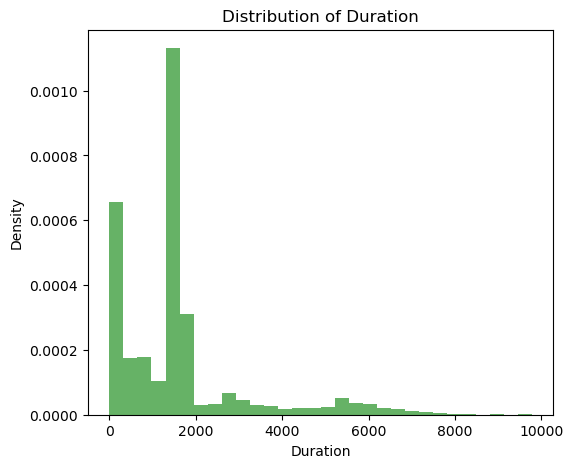

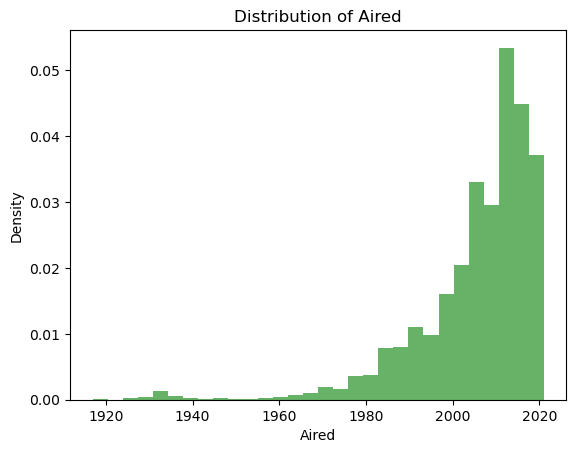

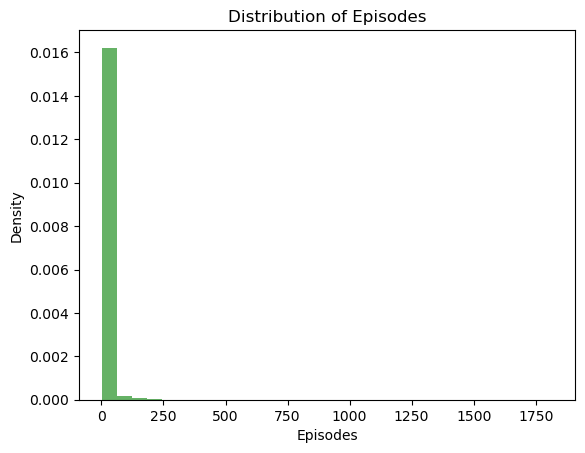

In [126]:
# Drop NaN values from 'Duration' column
duration = df['Duration'].dropna()
aired = df['Aired'].dropna()
episodes = df['Episodes'].dropna()

plt.figure(figsize=(6, 5))

# Create a histogram with a density curve
plt.hist(duration, bins=30, density=True, alpha=0.6, color='g')

plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')

plt.show()

# Repeat for 'Aired' and 'Episodes'
plt.hist(aired, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Aired')
plt.xlabel('Aired')
plt.ylabel('Density')
plt.show()

plt.hist(episodes, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Density')
plt.show()

In [127]:
columns_to_drop = ['Type', 'Rating', 'Genres', 'Score-1', 'Score-2', 'Score-3', 'Score-4', 'Score-5', 'Score-6', 'Score-7', 'Score-8', 'Score-9', 'Score-10', 
                   'Ranked', 'Favorites', 'Members' , 'Watching' , 'On-Hold' , 'Completed', 'Dropped', 'Plan to Watch', 
                   'MAL_ID', 'Name', 'English name' , 'Japanese name' , 'Premiered' , 'Producers', 'Licensors', 
                   'Source', 'Studios', 
                   'Unknown_Genre','Hentai', 'Yuri', 'Yaoi','Favorites', 'Popularity']

df = df.drop(columns_to_drop, axis=1)
df.columns

Index(['Score', 'Episodes', 'Aired', 'Duration', 'Action', 'Adventure',
       'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police',
       'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance',
       'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological',
       'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire',
       'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai',
       'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids',
       'Parody'],
      dtype='object')

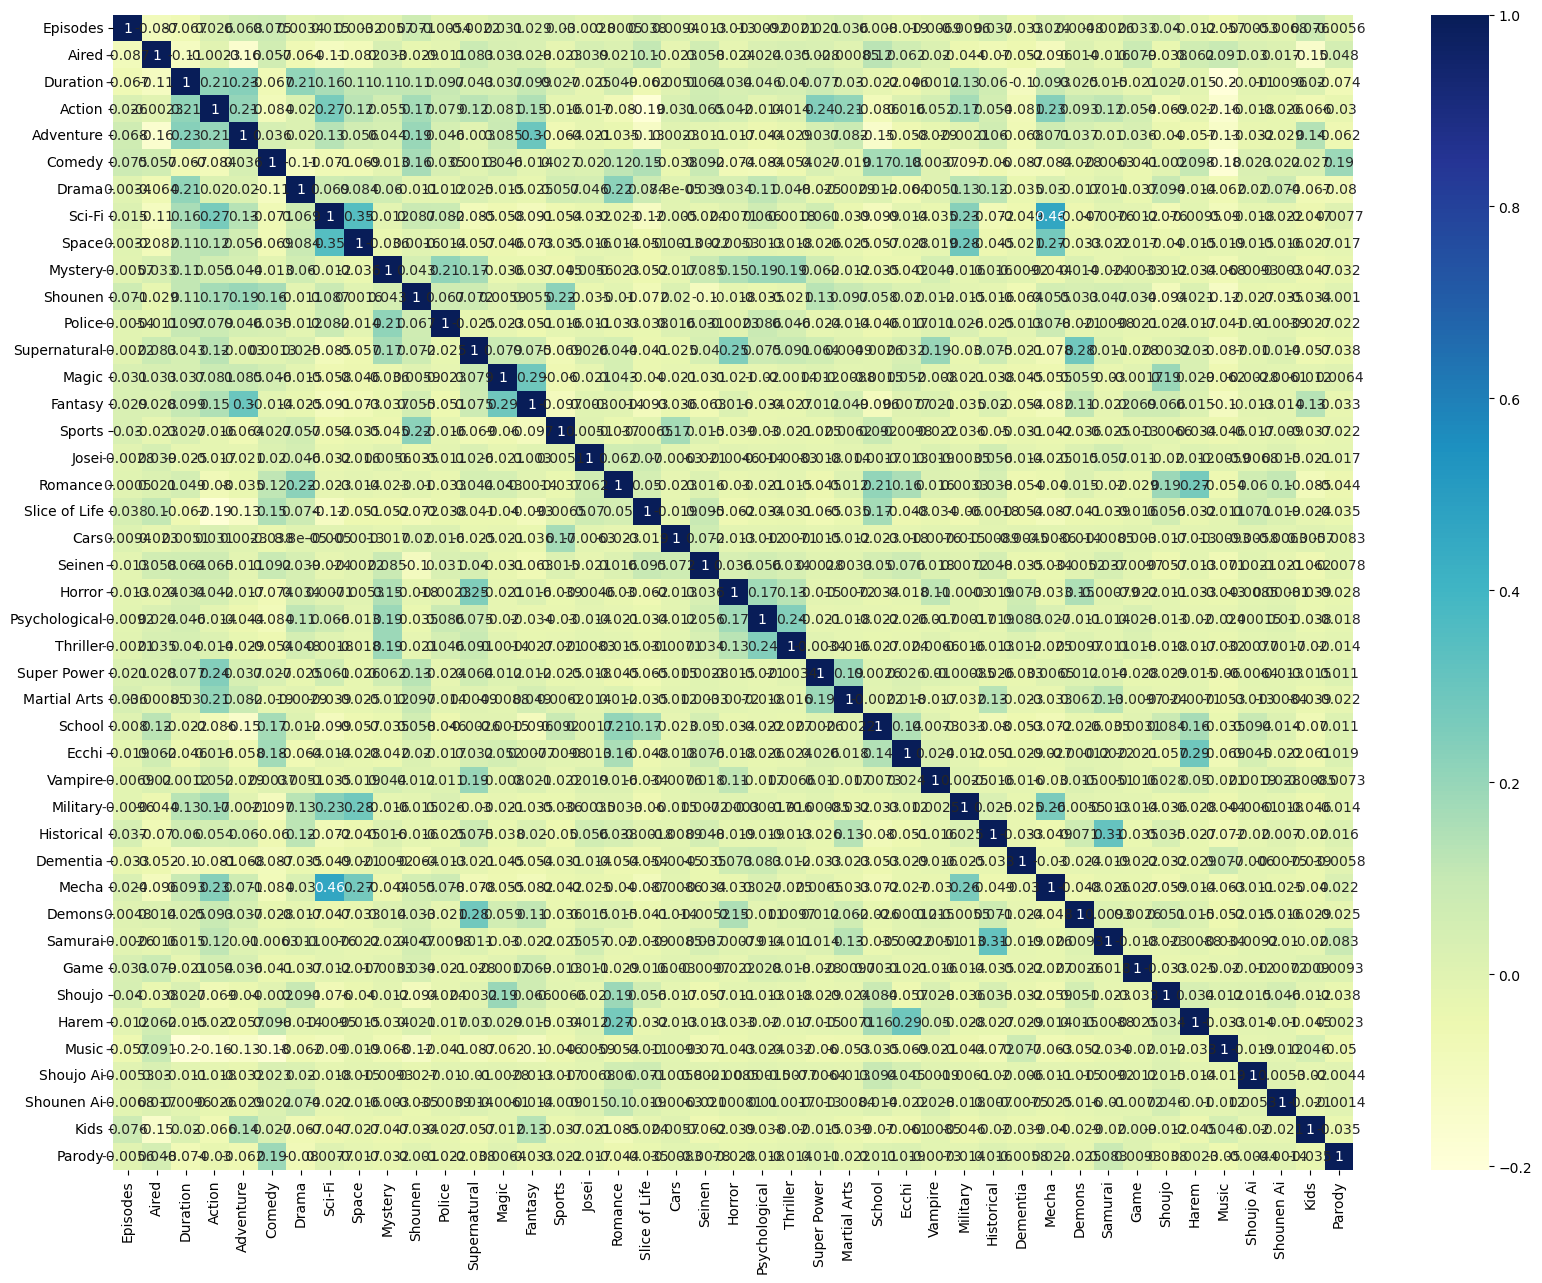

In [128]:

scaler = StandardScaler()

# Fit the scaler to the 'Aired', 'Completed', 'Dropped', and 'Favorites' columns and transform them
df[['Episodes', 'Duration', 'Aired']] = scaler.fit_transform(df[['Episodes', 'Duration', 'Aired']])
X = df.drop('Score', axis=1)
y = df['Score']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot=True, cmap='YlGnBu')
plt.show()

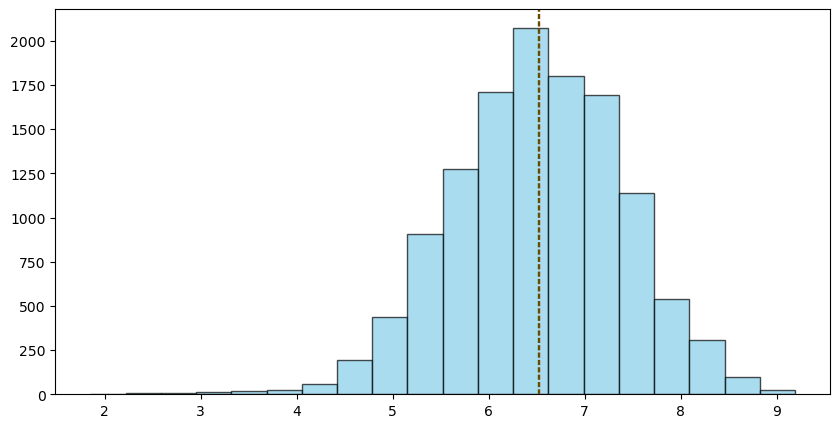

In [129]:
plt.figure(figsize=(10, 5))
plt.hist(df['Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Score'].median(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['Score'].mean(), color='green', linestyle='dashed', linewidth=1)

In [130]:
df['Score_Class'] = df['Score'].apply(lambda x: 1 if x >= 7.25 else 0)

In [131]:
X = df.drop(['Score', 'Score_Class'], axis=1)
y = df['Score_Class']

# def custom_leaky_relu(x):
#     return tf.nn.leaky_relu(x, alpha=0.02)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% for training
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% for validation, 15% for testing

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
    # tf.keras.layers.Dense(64, activation=custom_leaky_relu, kernel_regularizer=regularizers.l2(0.001)),
    # tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])


# Train the model with validation data
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Epoch 1/30


c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7456 - loss: 1.1881 - val_accuracy: 0.8153 - val_loss: 1.0245
Epoch 2/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8171 - loss: 1.0142 - val_accuracy: 0.8202 - val_loss: 0.9999
Epoch 3/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8168 - loss: 0.9924 - val_accuracy: 0.8180 - val_loss: 0.9936
Epoch 4/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8133 - loss: 0.9860 - val_accuracy: 0.8191 - val_loss: 0.9906
Epoch 5/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8195 - loss: 0.9826 - val_accuracy: 0.8153 - val_loss: 0.9905
Epoch 6/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8185 - loss: 0.9825 - val_accuracy: 0.8223 - val_loss: 0.9905
Epoch 7/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8163 - loss: 0.9857 - val_accuracy: 0.8137 - val_loss: 0.9914
Epoch 8/30
539/539 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8129 - loss: 0.9782 - val_accuracy: 0.8164 - val_

In [132]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred_prob = model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7974 - loss: 0.9839
Test accuracy: 0.8077964186668396
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1455
           1       0.60      0.29      0.39       392

    accuracy                           0.81      1847
   macro avg       0.72      0.62      0.64      1847
weighted avg       0.78      0.81      0.78      1847



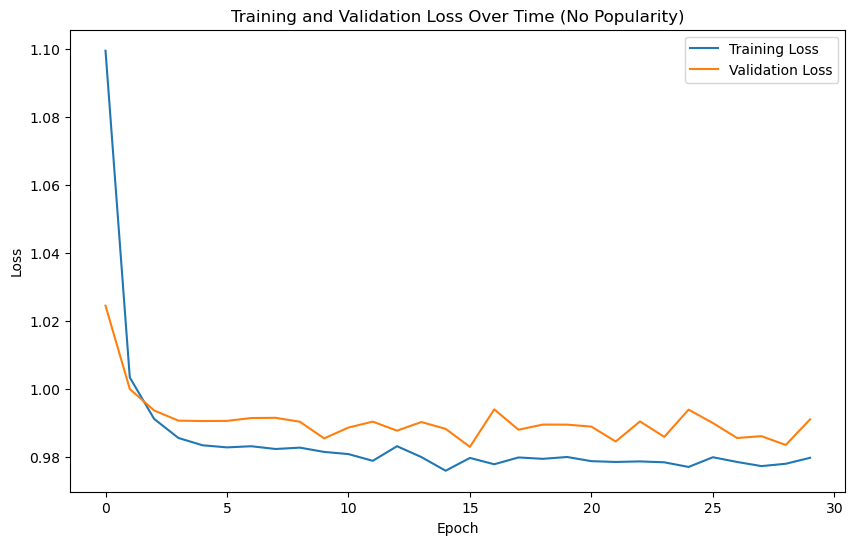

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time (No Popularity)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30


c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


616/616 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7523 - loss: 1.1751 - val_accuracy: 0.8169 - val_loss: 1.0178
Epoch 2/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8150 - loss: 1.0046 - val_accuracy: 0.8153 - val_loss: 0.9994
Epoch 3/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8100 - loss: 0.9903 - val_accuracy: 0.8272 - val_loss: 0.9863
Epoch 4/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8126 - loss: 0.9868 - val_accuracy: 0.8207 - val_loss: 0.9886
Epoch 5/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8254 - loss: 0.9838 - val_accuracy: 0.8158 - val_loss: 0.9881
Epoch 6/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8213 - loss: 0.9840 - val_accuracy: 0.8158 - val_loss: 0.9879
Epoch 7/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8091 - loss: 0.9849 - val_accuracy: 0.8180 - val_loss: 0.9848
Epoch 8/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8223 - loss: 0.9803 - val_accuracy: 0.8207 - val_

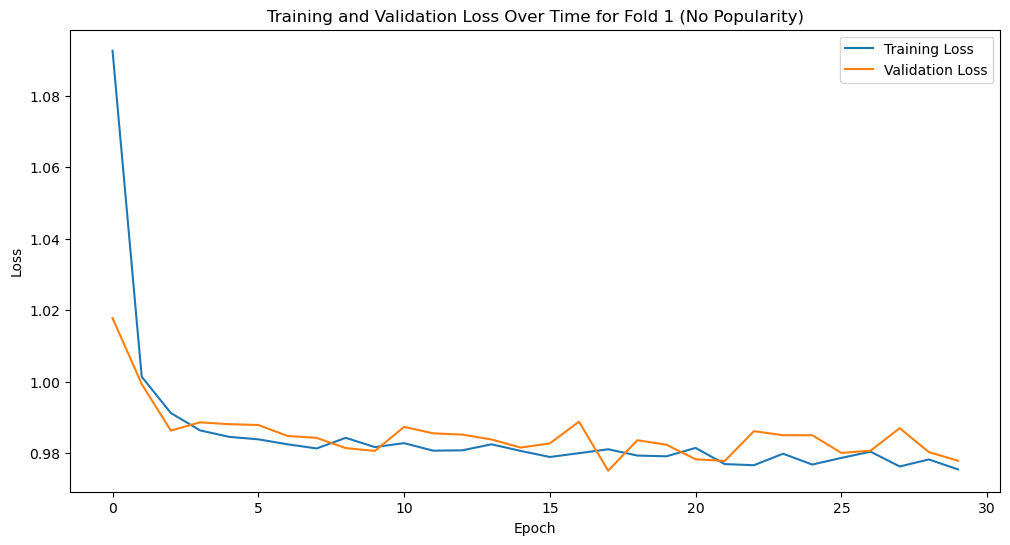

c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7411 - loss: 1.1816 - val_accuracy: 0.8256 - val_loss: 1.0150
Epoch 2/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 1.0061 - val_accuracy: 0.8239 - val_loss: 0.9951
Epoch 3/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8147 - loss: 0.9910 - val_accuracy: 0.8218 - val_loss: 0.9888
Epoch 4/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8185 - loss: 0.9873 - val_accuracy: 0.8158 - val_loss: 0.9911
Epoch 5/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8201 - loss: 0.9844 - val_accuracy: 0.8245 - val_loss: 0.9817
Epoch 6/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8144 - loss: 0.9817 - val_accuracy: 0.8250 - val_loss: 0.9831
Epoch 7/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8098 - loss: 0.9827 - val_accuracy: 0.8212 - val_loss: 0.9848
Epoch 8

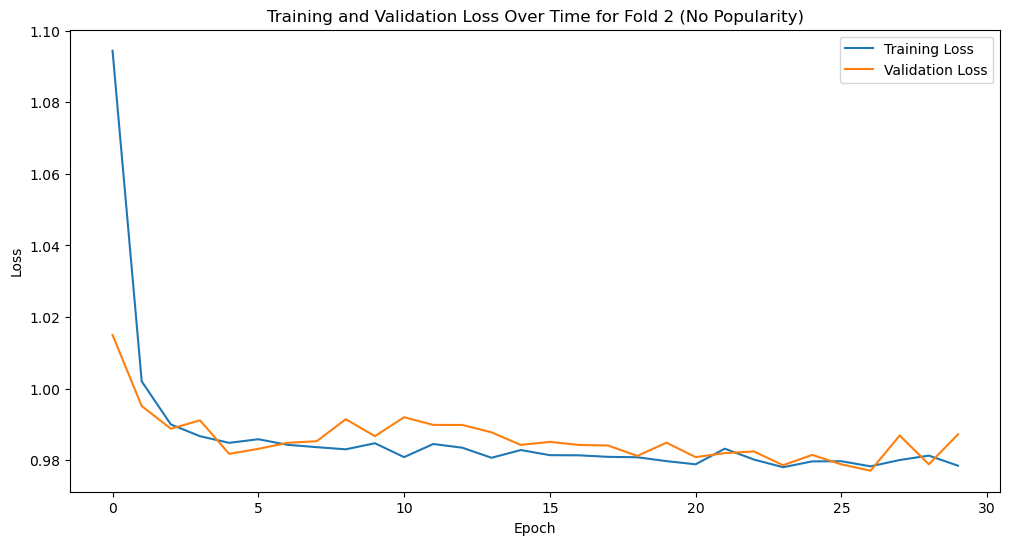

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/30


c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


616/616 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7525 - loss: 1.1817 - val_accuracy: 0.8169 - val_loss: 1.0209
Epoch 2/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8214 - loss: 1.0108 - val_accuracy: 0.8245 - val_loss: 0.9972
Epoch 3/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8198 - loss: 0.9916 - val_accuracy: 0.8174 - val_loss: 0.9909
Epoch 4/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8122 - loss: 0.9856 - val_accuracy: 0.8169 - val_loss: 0.9931
Epoch 5/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8161 - loss: 0.9865 - val_accuracy: 0.8142 - val_loss: 0.9904
Epoch 6/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8110 - loss: 0.9890 - val_accuracy: 0.8174 - val_loss: 0.9886
Epoch 7/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8190 - loss: 0.9824 - val_accuracy: 0.8196 - val_loss: 0.9869
Epoch 8/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8123 - loss: 0.9843 - val_accuracy: 0.8185 - val_

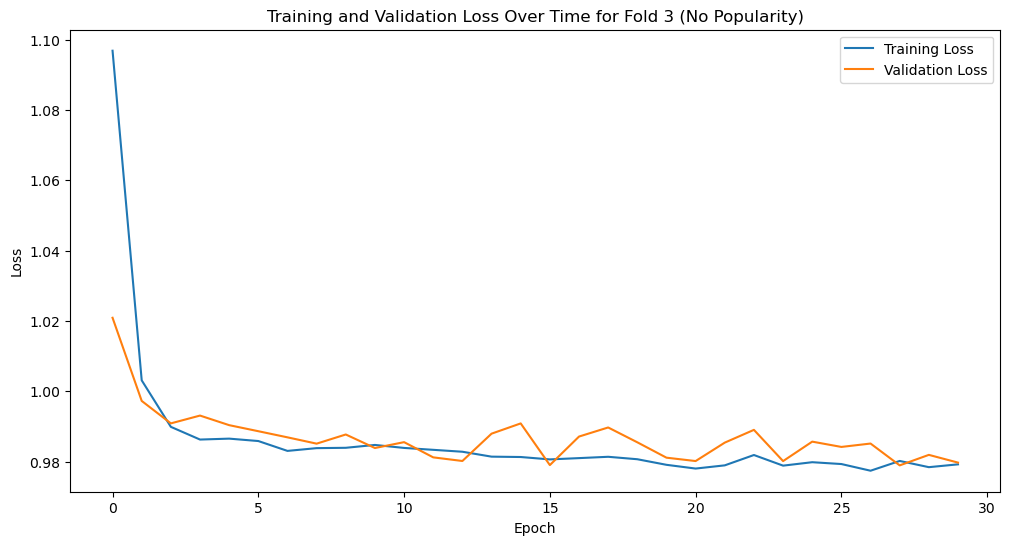

c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7496 - loss: 1.1854 - val_accuracy: 0.8223 - val_loss: 1.0141
Epoch 2/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8217 - loss: 1.0019 - val_accuracy: 0.8234 - val_loss: 0.9946
Epoch 3/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8191 - loss: 0.9936 - val_accuracy: 0.8218 - val_loss: 0.9858
Epoch 4/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.9843 - val_accuracy: 0.8245 - val_loss: 0.9875
Epoch 5/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.9856 - val_accuracy: 0.8180 - val_loss: 0.9889
Epoch 6/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8166 - loss: 0.9815 - val_accuracy: 0.8267 - val_loss: 0.9825
Epoch 7/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8117 - loss: 0.9829 - val_accuracy: 0.8218 - val_loss: 0.9833
Epoch 8

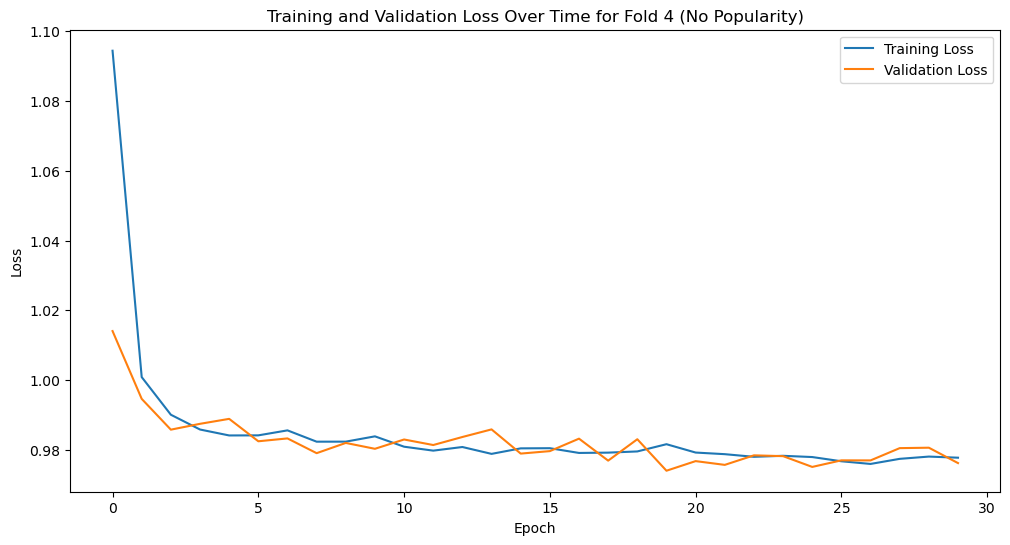

c:\Users\afara\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7351 - loss: 1.1867 - val_accuracy: 0.8202 - val_loss: 1.0174
Epoch 2/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8105 - loss: 1.0086 - val_accuracy: 0.8202 - val_loss: 0.9960
Epoch 3/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.9931 - val_accuracy: 0.8207 - val_loss: 0.9888
Epoch 4/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8172 - loss: 0.9879 - val_accuracy: 0.8256 - val_loss: 0.9853
Epoch 5/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8133 - loss: 0.9839 - val_accuracy: 0.8191 - val_loss: 0.9889
Epoch 6/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8113 - loss: 0.9883 - val_accuracy: 0.8234 - val_loss: 0.9847
Epoch 7/30
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8129 - loss: 0.9804 - val_accuracy: 0.8142 - val_loss: 0.9873
Epoch 8

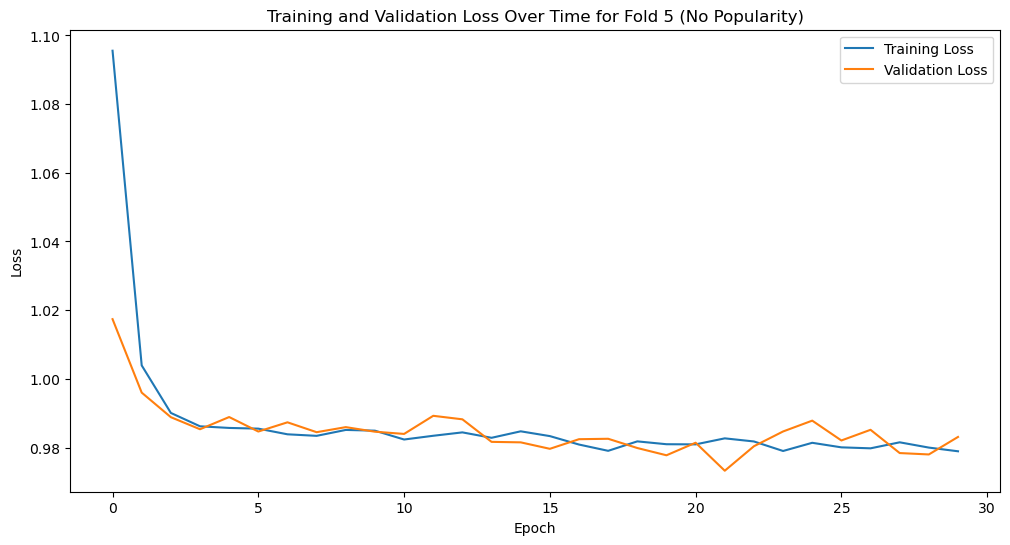

In [134]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

fold_no = 1
accuracies = [] 
for train, test in kfold.split(X, y):

  X_train, X_test = X.iloc[train], X.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]
  X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)
  X_test = scaler.transform(X_test)

  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.002), input_shape=(X_train.shape[1],)),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])


  model.compile(loss='categorical_hinge', optimizer='nadam', metrics=['accuracy'])


  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')


  history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), verbose=1)

  loss, accuracy = model.evaluate(X_test, y_test)
  accuracies.append(accuracy)

  plt.figure(figsize=(12, 6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Training and Validation Loss Over Time for Fold ' + str(fold_no) + ' (No Popularity)')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  fold_no = fold_no + 1

In [135]:
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy: {mean_accuracy}')
print(accuracies)

Mean accuracy: 0.8190579414367676
[0.8197076320648193, 0.8137520551681519, 0.8170005679130554, 0.827287495136261, 0.8175419569015503]


<ErrorbarContainer object of 3 artists>

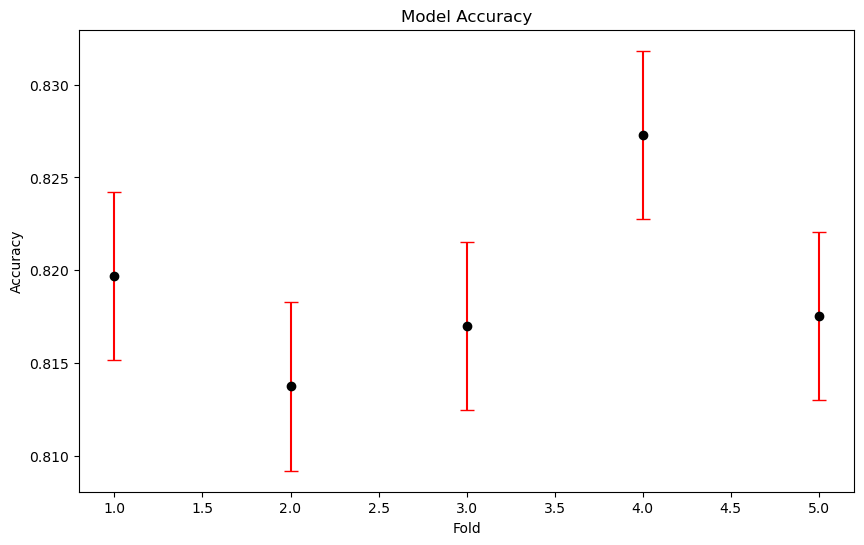

In [136]:
plt.figure(figsize=(10, 6))
plt.title('Model Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.errorbar(range(1, 6), accuracies, yerr=np.std(accuracies), fmt='o', color='black', ecolor='red', capsize=5)